# 算法名称： Kernelized Support Vector Machines
---

   - **LinearSVC (LSVM)**
   
   Linear Support Vector Classification. Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples. This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.
    
    
   - **SVC**
   
   Support Vector Machine for Classification implemented using libsvm. The multiclass support is handled according to a one-vs-one scheme. 


   - **SVR**
   
   Support Vector Machine for Regression implemented using libsvm.
   
   
**1. 类别**
    
    Classifier/Regressor, suppervised learning.


**2. 数学原理及证明**

   - **线性可分: LinearSVC**

   简单情况，线性可分，就是把问题转化为一个凸优化问题，可以用拉格朗日乘子法简化，然后用既有的算法解决。如下图：我们目的是为了找出一个分类效果好的超平面作为分类器。分类器的好坏的评定依据是分类间隔 **W=2d** 的大小，即分类间隔w越大，我们认为这个超平面的分类效果越好。此时，求解超平面的问题就变成了求解分类间隔W最大化的问题，W的最大化也就是d最大化的。
    
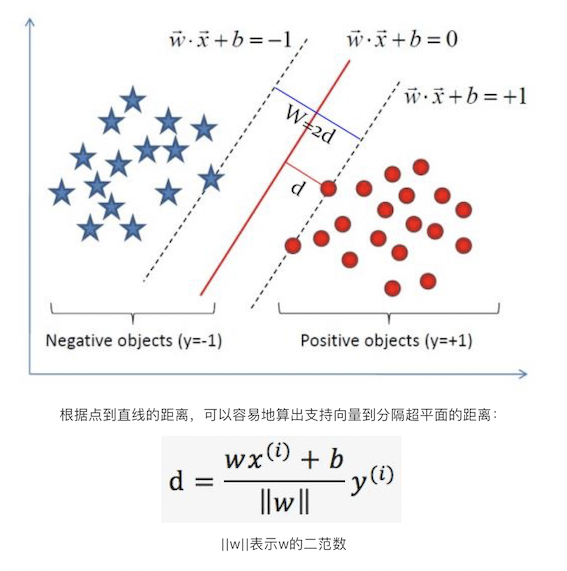
    
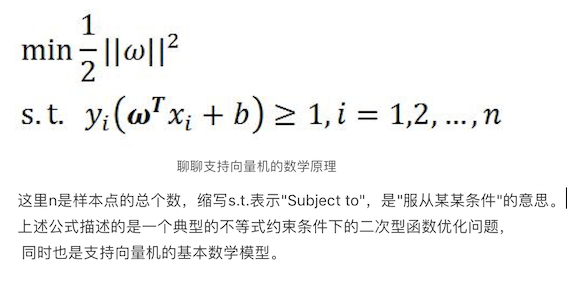
    
   - **线性不可分: SVC**
   
   复杂情况，线性不可分，用核函数将样本投射到高维空间，使其变成线性可分的情形，利用核函数来减少高纬度计算量。
   
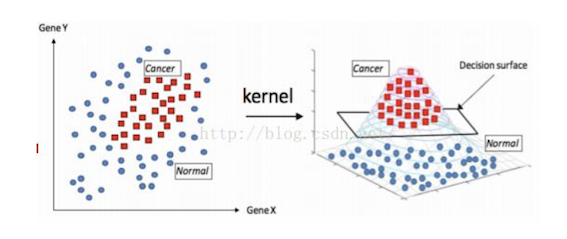
   
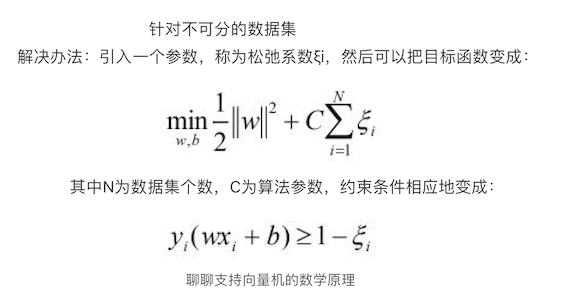

怎样理解松弛系数？我们可以把ξi理解为数据样本X违反最大间距规则的程度，针对大部分正常的样本，即满足约束条件的样本ξ=0，而对部分违反最大间距规则的样本ξ>0，参数C表示对违反最大间距规则样本的'惩罚'力度，当C比较大的时候，对于违反规则的点的惩罚力度将变得很大，C比较小的时候，对于违反规则的点，其付出的代价不是特别大，一般模型会倾向于允许部分样本违反最大间距规则。 松弛系数类似逻辑回归中的正则项，目的都是为了纠正过拟合问题，让支持向量机对噪声数据有更强的适应性。

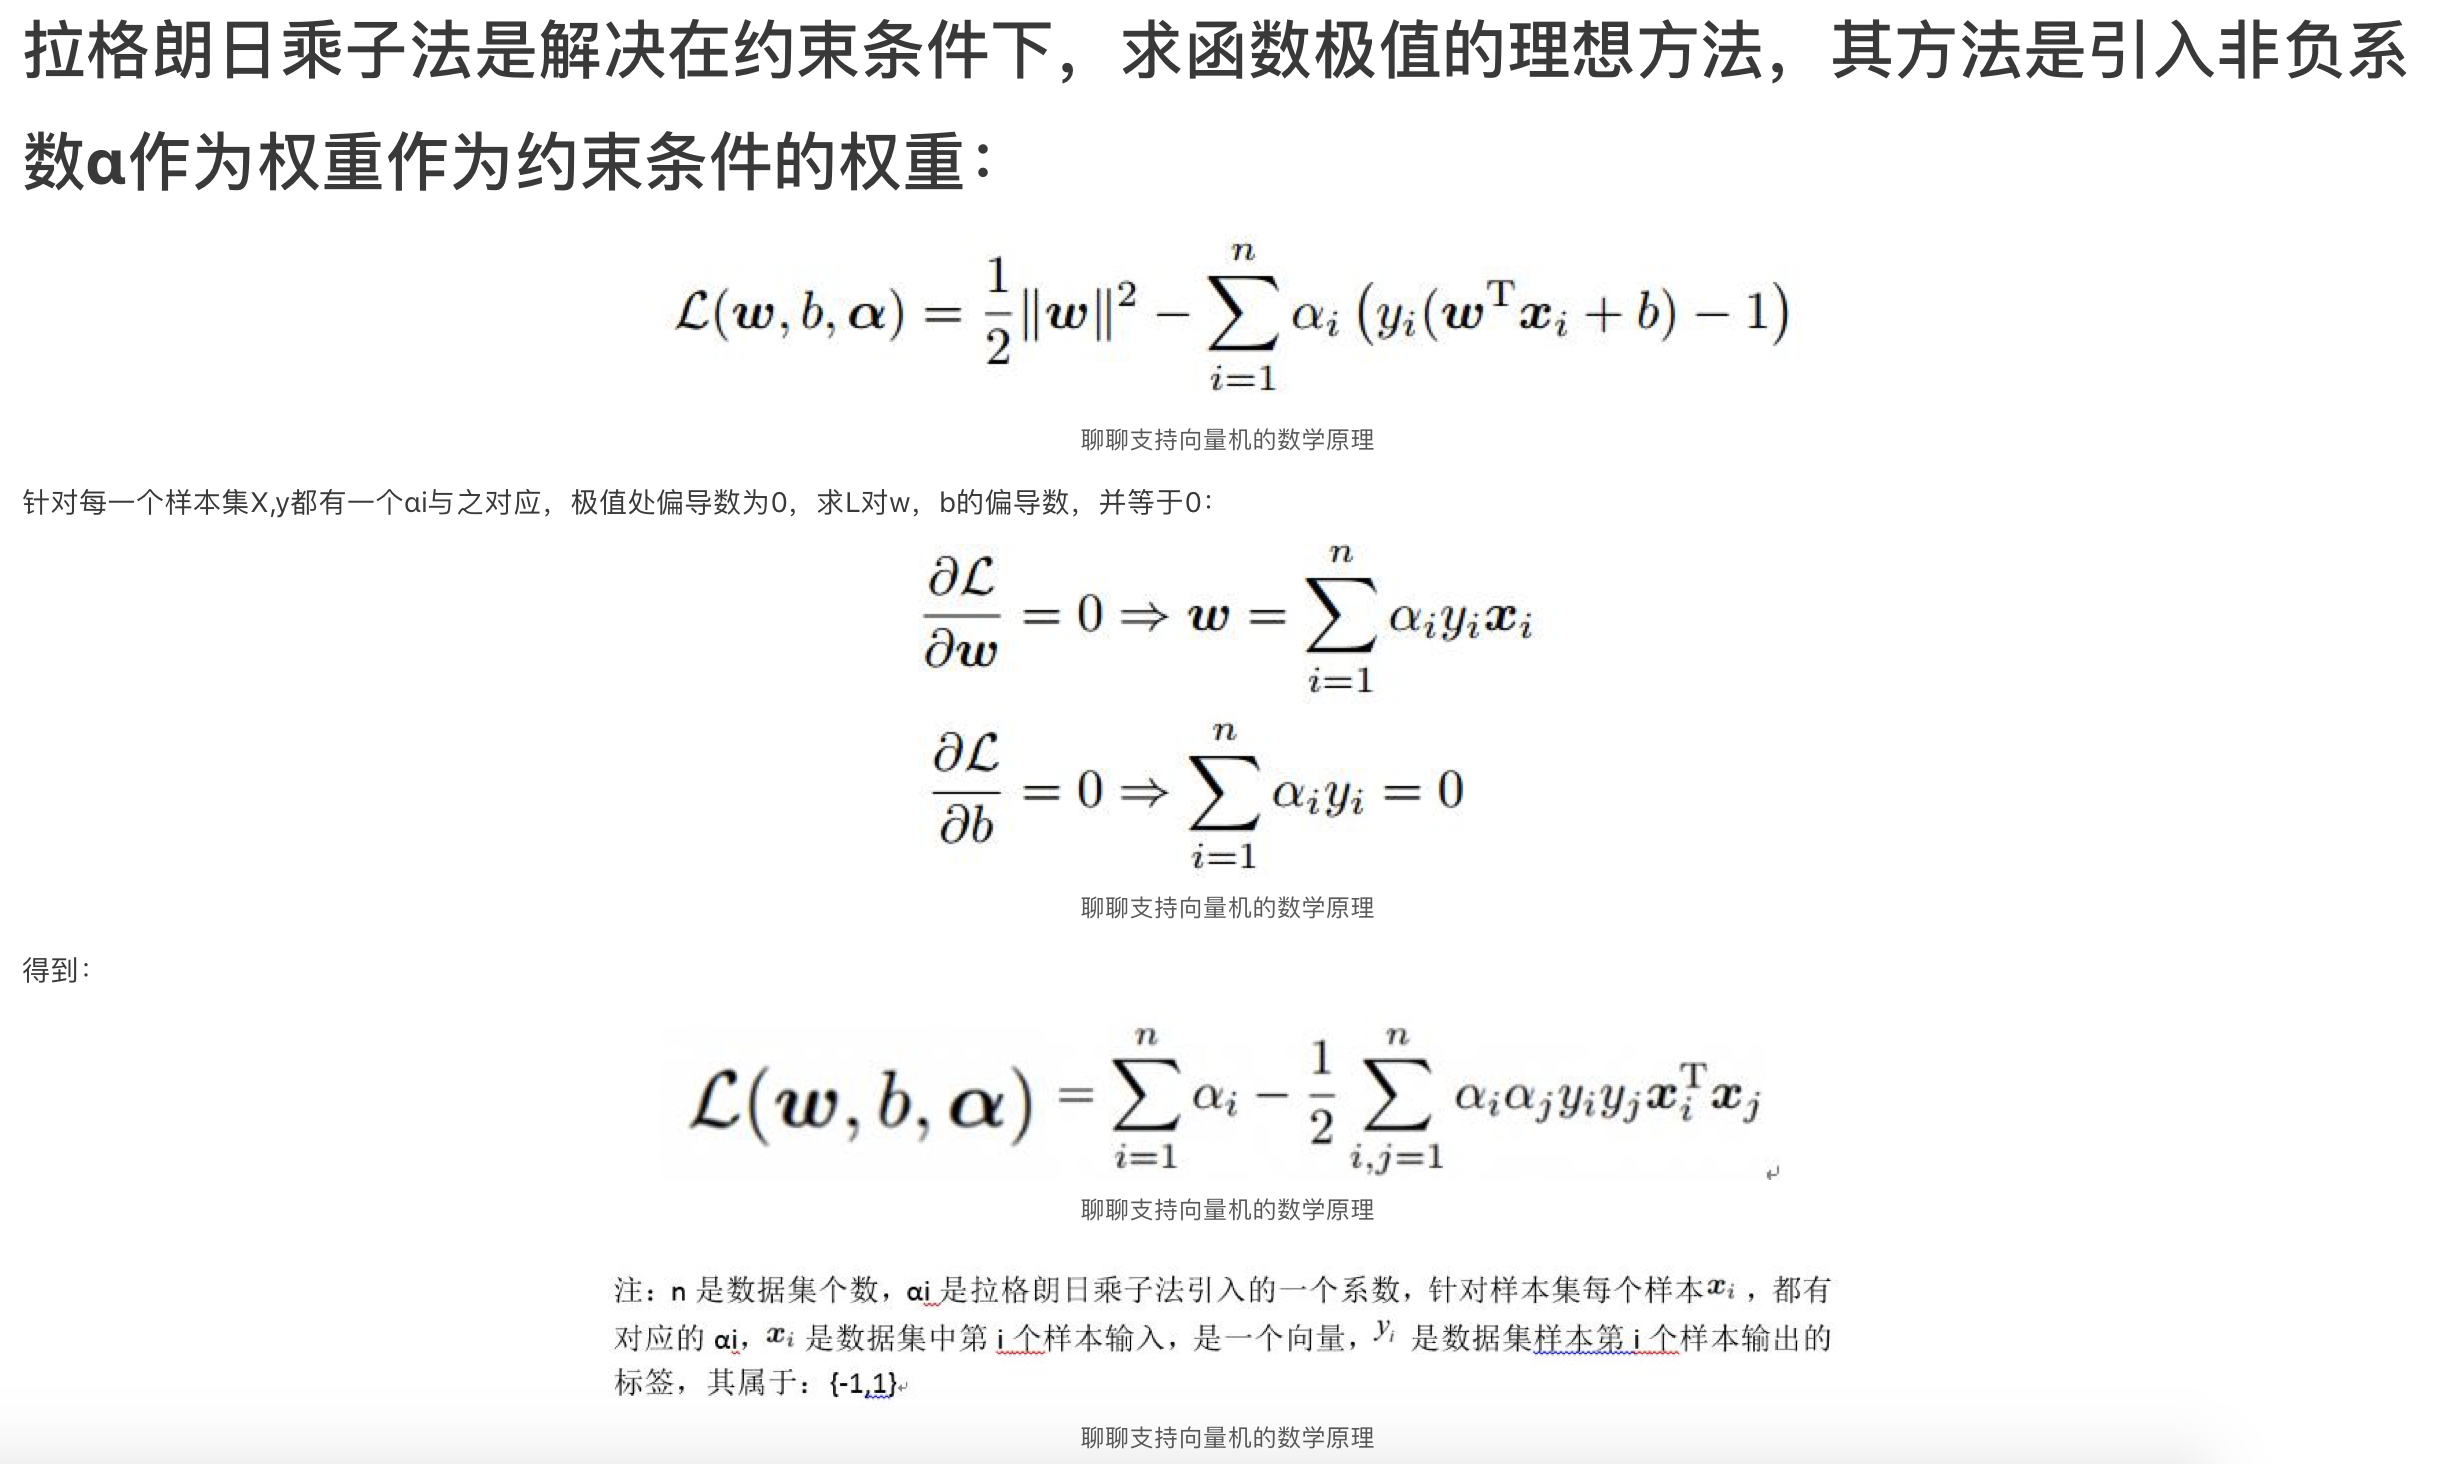

**3. sklearn中的算法实现**

```
sklearn.svm.LinearSVC(penalty=’l2’, 
                      loss=’squared_hinge’, 
                      dual=True, 
                      tol=0.0001, 
                      C=1.0, 
                      multi_class=’ovr’, 
                      fit_intercept=True, 
                      intercept_scaling=1, 
                      class_weight=None, 
                      verbose=0, 
                      random_state=None, 
                      max_iter=1000)
```                      
- C : float, optional (default=1.0)
    Penalty parameter C of the error term.
    
- multi_class : string, ‘ovr’ or ‘crammer_singer’ (default=’ovr’)
    Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest classifiers, while "crammer_singer" optimizes a joint objective over all classes. While crammer_singer is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely leads to better accuracy and is more expensive to compute. If "crammer_singer" is chosen, the options loss, penalty and dual will be ignored.
    
- class_weight : {dict, ‘balanced’}, optional
    Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

```
sklearn.svm.SVC(C=1.0, 
                kernel=’rbf’, 
                degree=3, 
                gamma=’auto_deprecated’, 
                coef0=0.0, 
                shrinking=True, 
                probability=False, 
                tol=0.001, 
                cache_size=200, 
                class_weight=None, 
                verbose=False, 
                max_iter=-1, 
                decision_function_shape=’ovr’, 
                random_state=None)
```

- C : float, optional (default=1.0)
        Penalty parameter C of the error term.
    
- kernel : string, optional (default=’rbf’)
    Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
    
- degree : int, optional (default=3)
    Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
    
- gamma : float, optional (default=’auto’)
    Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    Current default is ‘auto’ which uses 1 / n_features, if gamma='scale' is passed then it uses 1 / (n_features * X.var()) as value of gamma. The current default of gamma, ‘auto’, will change to ‘scale’ in version 0.22. ‘auto_deprecated’, a deprecated version of ‘auto’ is used as a default indicating that no explicit value of gamma was passed.
    
- decision_function_shape : ‘ovo’, ‘ovr’, default=’ovr’
    I Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy.


```
sklearn.svm.SVR(kernel=’rbf’, 
                degree=3, 
                gamma=’auto_deprecated’, 
                coef0=0.0, 
                tol=0.001, 
                C=1.0, 
                epsilon=0.1, 
                shrinking=True, 
                cache_size=200, 
                verbose=False, 
                max_iter=-1)
```

- C : float, optional (default=1.0)
    Penalty parameter C of the error term.

- epsilon : float, optional (default=0.1)
    Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.
    

**3. 算法关键参数及特点**   
   - LinearSVC (default: L2 Regularization) 

      > 参数：C = 1.0 #default, **Decrease C, Model More Generalization** 
    
          >> overfitting < small immersion decision boundary (a smaller margin) < less regularization < C Larger 

          >> underfitting < large immersion decision boundary (a larger margin) < more regularization < C Smaller  

    
   - SVC (Kernel: rbf)
        
      > 参数：C = 1.0     #larger values of C --> a smaller margin 
```
The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words``C`` behaves as a regularization parameter in the SVM.
```

      > 参数：gamma = 1.0 the radius of the area of influence of the support vectors # high gamma --> the influence of support vector is close
```
The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
```
    
          >> underfitting < larger margin < C lower 
                          < far to suppport vector < gamma lower 

          >> overfitting  < smaller margin < C higher
                          < close to suppport vector < gamma higher      
                          
| c | gamma | the number of support vector |
| --- | --- | --- |
| 0.1 | 0.1 | __26__ |
| 0.1 | 1 | __26__ | 
| 0.1 | 10 | __26__ | 
| 1 | 0.1 | __11__ |
| 1 | 1 | __16__ | 
| 1 | 10 | __25__ | 
| 100 | 0.1 | __7__ |
| 100 | 1 | __16__ | 
| 100 | 10 | __25__ | 
                          

          

   - SVR (default: L2 Regularization) 

      > 参数：C = 1.0 #default, **Decrease C, Model More Generalization** 
    
          >> overfitting < small immersion decision boundary (a smaller margin) < less regularization < C Larger 

          >> underfitting < large immersion decision boundary (a larger margin) < more regularization < C Smaller  
          




**4. 模型选择**

  - LinearSVC 在高维数据集，尤其是稀疏的高维数据集上很高效。因为LSVC仅仅需要使用训练集的子集（支持向量）去建立模型，所以算法本身可以使用相对较小的内存。

  
**5. Regularization**
  - L1 Regularization会迫使一些coefficients等于0，这样就相当于自动进行了特征选择，对于那些coefficients等于0的特征就过滤掉了。从计算上来说就是生成了洗漱的稀疏空间矩阵（sparse model）。     
  - L2 Regularization会迫使所有的coefficients无限逼近于0。所有的特征值都会通过一个因子进行收缩，并且会被计算。    
  - Elastic nets Regularization结合了L1 & L2,增加了一个超参数。 

**6. Refer to**

  - https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
  - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
  - https://www.cnblogs.com/Belter/p/8975606.html
  - https://blog.csdn.net/v_july_v/article/details/7624837
  - https://zhuanlan.zhihu.com/p/33692660
  
  

In [13]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp 
print("scipy version: {}".format(sp.__version__))

import IPython 
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("sklearn version: {}".format(sklearn.__version__))

import warnings
warnings.filterwarnings('ignore')

import mglearn
import matplotlib.pyplot as plt

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
numpy version: 1.15.4
scipy version: 1.1.0
IPython version: 7.4.0
sklearn version: 0.20.1


linear svm can not predict this kind of data set. 


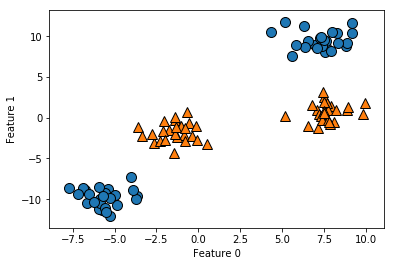

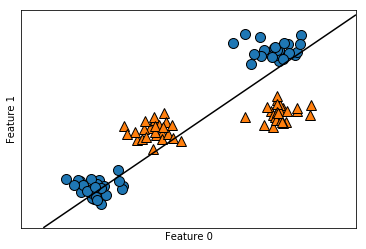

In [14]:

print("linear svm can not predict this kind of data set. ")

from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

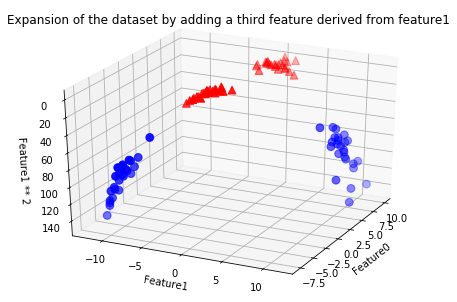

In [15]:
# add the squared first feature

X_new = np.hstack([X, X[:,1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

#visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
#plot first all the points with y==0, then all the y==1

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1 ** 2")
plt.title("Expansion of the dataset by adding a third feature derived from feature1")
plt.show()

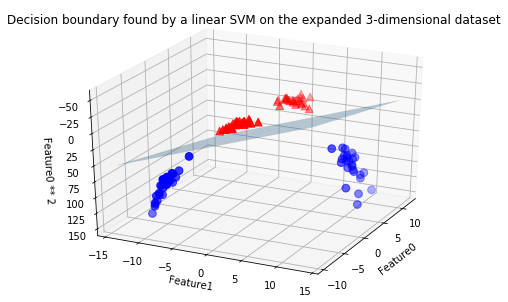

In [16]:
# With the new dataset, it shows that we can separate the two classes with a linear model now. 

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

#show linear decision boundary
figure= plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:,0].min() - 2 , X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2 , X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s =60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s =60)

ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature0 ** 2")
plt.title("Decision boundary found by a linear SVM on the expanded 3-dimensional dataset")
plt.show()

In [17]:
ZZ = YY ** 2, 
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.set_title("The decision boundary from the previous as a funtion of the original two features")
plt.show()

AttributeError: 'tuple' object has no attribute 'ravel'

---
## SVC
---

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

 
Parameter: 'gamma' controls the width of the Gaussian kernel
Parameter: 'C' is a regularization parameter

 
We can see these 5 support vectors highly marked in the graph below
[[ 8.1062269   4.28695977]
 [ 9.50169345  1.93824624]
 [11.563957    1.3389402 ]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]


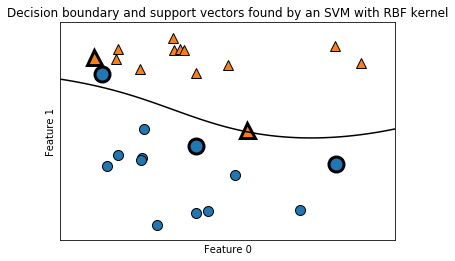

In [30]:
from sklearn.svm import SVC

# train data with SVM (RBF kernel)
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
print(svm)
print("\n ")
print("Parameter: 'gamma' controls the width of the Gaussian kernel")
print("Parameter: 'C' is a regularization parameter")

mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#lot support vectors
sv = svm.support_vectors_
print("\n ")
print("We can see these 5 support vectors highly marked in the graph below")
print(sv)

# class labels of supports vectors are gived by the sign of the dual coefficients 
sv_labels = svm.dual_coef_.ravel() > 0 
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Decision boundary and support vectors found by an SVM with RBF kernel")
plt.show()


In [33]:
# train data with SVM (RBF kernel)
C=[0.1, 1.0, 100.0]
Gamma=[0.1, 1.0, 10.0]

for c1 in C:
    for g1 in Gamma:
        svm_c_g = SVC(kernel='rbf', C=c1, gamma=g1).fit(X, y)
        sv = svm_c_g.support_vectors_
        print("\n ")
        print("C={}, gamma={}, The number of SV={}".format(c1, g1, sv.shape))


 
C=0.1, gamma=0.1, The number of SV=(26, 2)

 
C=0.1, gamma=1.0, The number of SV=(26, 2)

 
C=0.1, gamma=10.0, The number of SV=(26, 2)

 
C=1.0, gamma=0.1, The number of SV=(11, 2)

 
C=1.0, gamma=1.0, The number of SV=(16, 2)

 
C=1.0, gamma=10.0, The number of SV=(25, 2)

 
C=100.0, gamma=0.1, The number of SV=(7, 2)

 
C=100.0, gamma=1.0, The number of SV=(16, 2)

 
C=100.0, gamma=10.0, The number of SV=(25, 2)


Decision boundaries and support vectors for different settings against C/gamma


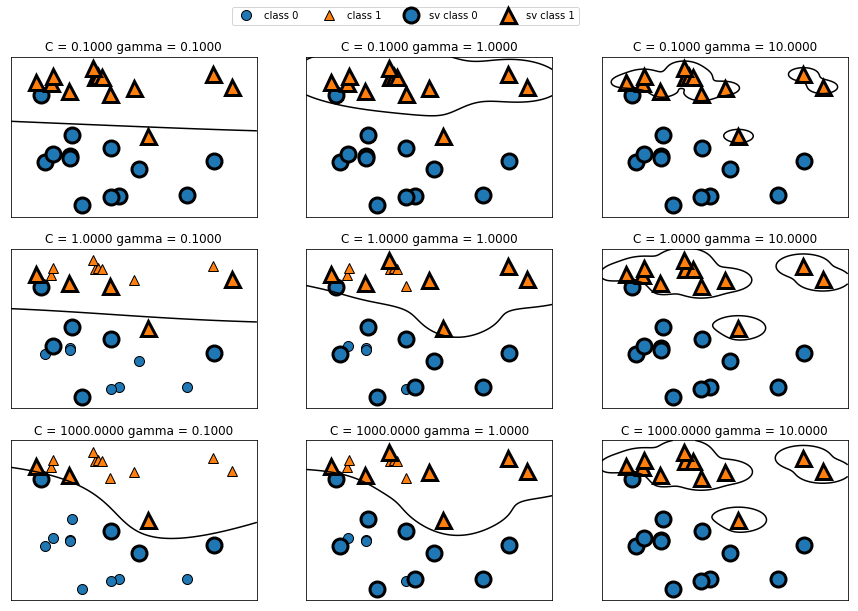

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]): 
    for a , gamma in zip(ax, range(-1, 2)): 
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(0.9, 1.2))
print("Decision boundaries and support vectors for different settings against C/gamma")
plt.show()

Accuracy on training set: 1.00
Accuracy on test set: 0.63


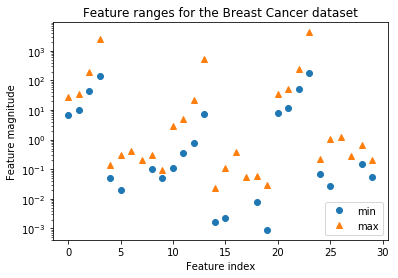

In [20]:
# use default prameters: C=1 and gamma=1/n_features
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#load breast cancer data set and split it with train and test
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")
plt.title("Feature ranges for the Breast Cancer dataset")
plt.show()

In [21]:
# compute the minimum value per feature on the training set 
min_on_training = X_train.min(axis=0)

# compute the range of each feature (max - min) on the training set 
range_on_training = (X_train - min_on_training).max(axis=0)

#subtract the min, and divide by rang
#afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))
print("\n")

# use the same transformation on the test set, 
# using min and range of the training set
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Default C parameter")
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))
print("\n")


svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("C=1000")
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))



Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Default C parameter
Accuracy on training set: 0.948
Accuracy on test set: 0.951


C=1000
Accuracy on training set: 0.988
Accuracy on test set: 0.972


---
## Example to show SVM with different kernel
---

Automatically created module for IPython interactive environment


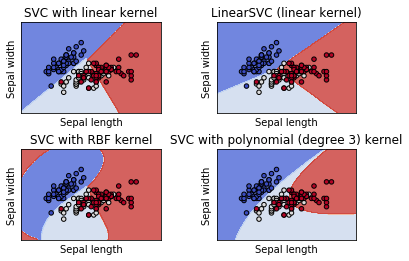

In [22]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


Automatically created module for IPython interactive environment


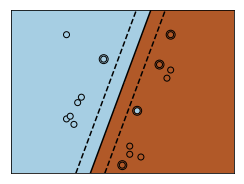

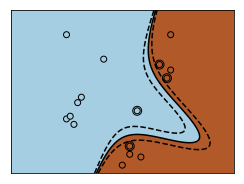

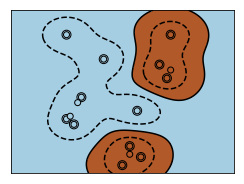

In [23]:
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# Our dataset and targets
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

# figure number
fignum = 1

# fit the model
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()


Automatically created module for IPython interactive environment


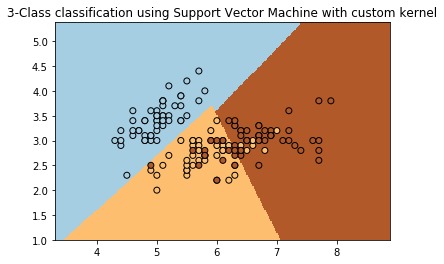

In [24]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


## --------this is the custom kernel -------
def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)
## -------this is the custom kernel -------

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()

---
## Example to scale the regularization parameter for SVCs
---

Automatically created module for IPython interactive environment


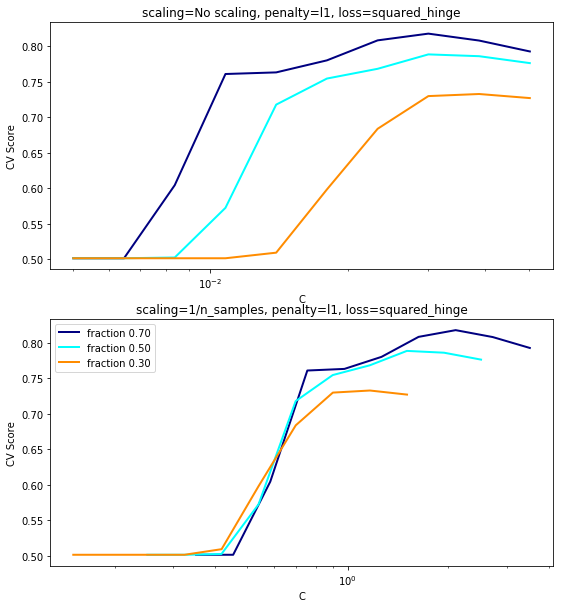

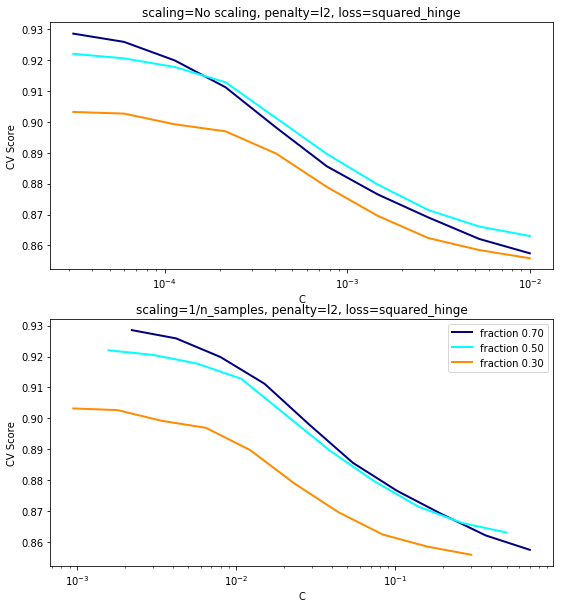

In [25]:
print(__doc__)


# Author: Andreas Mueller <amueller@ais.uni-bonn.de>
#         Jaques Grobler <jaques.grobler@inria.fr>
# License: BSD 3 clause


import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_random_state
from sklearn import datasets

rnd = check_random_state(1)

# set up dataset
n_samples = 100
n_features = 300

# l1 data (only 5 informative features)
X_1, y_1 = datasets.make_classification(n_samples=n_samples,
                                        n_features=n_features, n_informative=5,
                                        random_state=1)

# l2 data: non sparse, but less features
y_2 = np.sign(.5 - rnd.rand(n_samples))
X_2 = rnd.randn(n_samples, n_features // 5) + y_2[:, np.newaxis]
X_2 += 5 * rnd.randn(n_samples, n_features // 5)

clf_sets = [(LinearSVC(penalty='l1', loss='squared_hinge', dual=False,
                       tol=1e-3),
             np.logspace(-2.3, -1.3, 10), X_1, y_1),
            (LinearSVC(penalty='l2', loss='squared_hinge', dual=True,
                       tol=1e-4),
             np.logspace(-4.5, -2, 10), X_2, y_2)]

colors = ['navy', 'cyan', 'darkorange']
lw = 2

for clf, cs, X, y in clf_sets:
    # set up the plot for each regressor
    fig, axes = plt.subplots(nrows=2, sharey=True, figsize=(9, 10))

    for k, train_size in enumerate(np.linspace(0.3, 0.7, 3)[::-1]):
        param_grid = dict(C=cs)
        # To get nice curve, we need a large number of iterations to
        # reduce the variance
        grid = GridSearchCV(clf, refit=False, param_grid=param_grid,
                            cv=ShuffleSplit(train_size=train_size,
                                            test_size=.3,
                                            n_splits=250, random_state=1))
        grid.fit(X, y)
        scores = grid.cv_results_['mean_test_score']

        scales = [(1, 'No scaling'),
                  ((n_samples * train_size), '1/n_samples'),
                  ]

        for ax, (scaler, name) in zip(axes, scales):
            ax.set_xlabel('C')
            ax.set_ylabel('CV Score')
            grid_cs = cs * float(scaler)  # scale the C's
            ax.semilogx(grid_cs, scores, label="fraction %.2f" %
                        train_size, color=colors[k], lw=lw)
            ax.set_title('scaling=%s, penalty=%s, loss=%s' %
                         (name, clf.penalty, clf.loss))

    plt.legend(loc="best")
plt.show()

Automatically created module for IPython interactive environment
The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


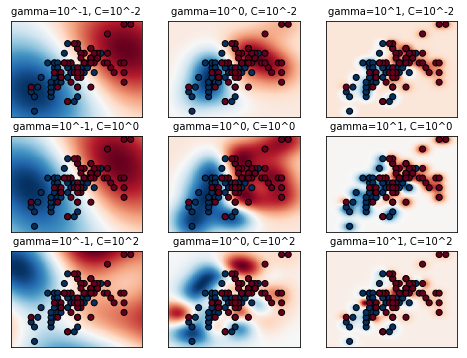

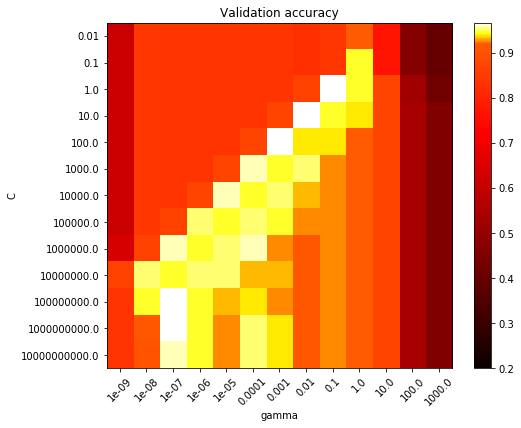

In [26]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

---
## Comparison of kernel ridge regression and SVR
---

SVR complexity and bandwidth selected and model fitted in 0.361 s
KRR complexity and bandwidth selected and model fitted in 0.138 s
Support vector ratio: 0.320
SVR prediction for 100000 inputs in 0.045 s
KRR prediction for 100000 inputs in 0.106 s


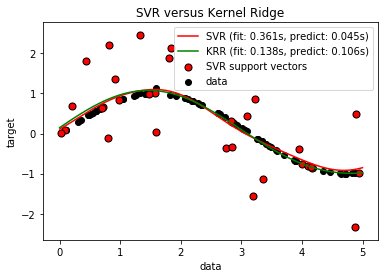

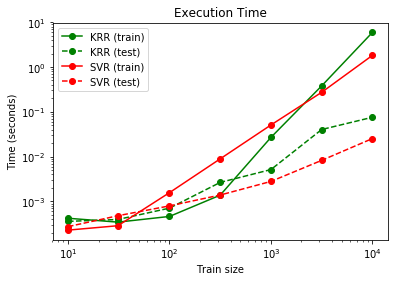

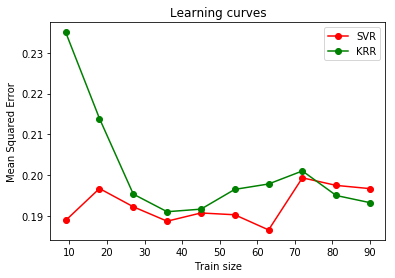

In [27]:
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD 3 clause


import time

import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)

# #############################################################################
# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

X_plot = np.linspace(0, 5, 100000)[:, None]

# #############################################################################
# Fit regression model
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X[:train_size], y[:train_size])
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)

sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
y_svr = svr.predict(X_plot)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X_plot)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))


# #############################################################################
# Look at the results
sv_ind = svr.best_estimator_.support_
plt.scatter(X[sv_ind], y[sv_ind], c='r', s=50, label='SVR support vectors',
            zorder=2, edgecolors=(0, 0, 0))
plt.scatter(X[:100], y[:100], c='k', label='data', zorder=1,
            edgecolors=(0, 0, 0))
plt.plot(X_plot, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(X_plot, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7).astype(np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",
         label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",
         label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()